In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import regularizers

2024-08-15 10:32:50.970553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 10:32:50.986257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 10:32:50.990582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import glob
import os
import pathlib

base_dir = pathlib.Path('../data/images/')
base_dir

PosixPath('../data/images')

In [5]:
image_count = len(list(base_dir.glob('*/*.jpg')))
image_count

10015

In [6]:
batch_size = 32
img_height = 450
img_width = 600

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 0,
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 10015 files belonging to 7 classes.
Using 8012 files for training.


I0000 00:00:1723710774.074463   10109 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723710774.126840   10109 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723710774.126906   10109 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723710774.129216   10109 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723710774.129540   10109 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [21]:
import tensorflow as tf

model = tf.keras.Sequential([
            tf.keras.layers.Rescaling(1./255),

            tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.33),
            
            tf.keras.layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.33),
            
            tf.keras.layers.Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.33),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.66),

            tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.66),
            
            tf.keras.layers.Dense(7, activation='softmax')
            ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

epochs = 5

early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            min_delta = 0.005, 
            patience = 4, 
            restore_best_weights=True
            )

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
            monitor = 'val_loss', 
            factor = 0.1, 
            patience = 5, 
            min_lr = 5e-7
            )


history = model.fit(train_ds,
            validation_data = val_ds,
            epochs = epochs,
            callbacks = [early_stopping, lr_scheduler])

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 78s 279ms/step - accuracy: 0.2404 - loss: 20.7300 - val_accuracy: 0.1108 - val_loss: 7.7336 - learning_rate: 0.0010
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 247ms/step - accuracy: 0.5239 - loss: 5.2583 - val_accuracy: 0.6740 - val_loss: 3.1847 - learning_rate: 0.0010
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 237ms/step - accuracy: 0.6147 - loss: 3.2894 - val_accuracy: 0.6740 - val_loss: 2.8352 - learning_rate: 0.0010
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 265ms/step - accuracy: 0.6490 - loss: 2.6183 - val_accuracy: 0.6740 - val_loss: 2.4974 - learning_rate: 0.0010
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 250ms/step - accuracy: 0.6580 - loss: 2.2768 - val_accuracy: 0.6740 - val_loss: 2.0541 - learning_rate: 0.0010


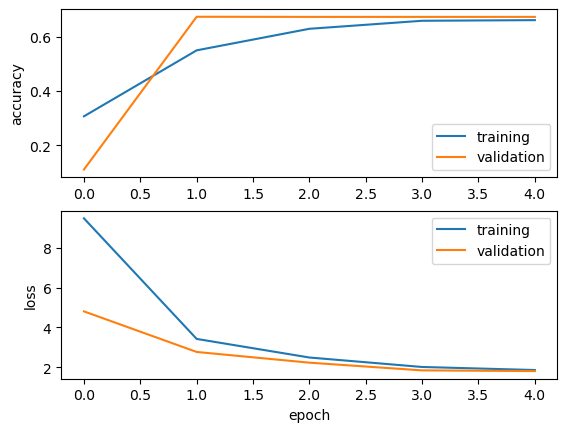

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2)
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='validation accuracy')
axs[0].set_ylabel('accuracy')
axs[0].legend(['training', 'validation'])

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='validation loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['training', 'validation'])


plt.show()

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 450, 600, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 448, 598, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 448, 598, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 224, 299, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 299, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 297, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 222, 297, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 111, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 146, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 109, 146, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 504576)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    32,292,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,168,023 (370.67 MB)

 Trainable params: 32,389,127 (123.55 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 64,778,256 (247.11 MB)

In [22]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    '/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/test_images',
    seed=32,
    image_size=(img_height, img_width),
    batch_size=batch_size)
results = model.evaluate(test_ds)
print("test loss: {:.2f}, test acc: {:.2f}".format(results[0], results[1]))

Found 1511 files belonging to 7 classes.
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6091 - loss: 2.2059
test loss: 2.22, test acc: 0.60


In [23]:
model2 = tf.keras.models.load_model('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/CNN_194M_diagnosis_accuracy.keras')

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/test_images',
    seed=32,
    image_size=(img_height, img_width),
    batch_size=batch_size)
results = model2.evaluate(test_ds)
print("test loss: {:.2f}, test acc: {:.2f}".format(results[0], results[1]))

Found 1511 files belonging to 7 classes.
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6279 - loss: 1.6506
test loss: 1.68, test acc: 0.62
